## Imports necessários

In [1]:
from sklearn import tree, neighbors, linear_model, naive_bayes
import pandas as pd
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

### Atribuindo o nome das colunas ao cabeçalho do dataset

In [2]:
column_names = ['intercolumnar distance', 'upper margin', 'lower margin', 'exploitation', 'row number', 'modular ratio', 'interlinear spacing', 'weight', 'peak number', 'modular ratio/ interlinear spacing', 'class']

In [3]:
df_tr = pd.read_csv('avila-tr.txt', header=None)
df_ts = pd.read_csv('avila-ts.txt', header=None)

In [4]:
df_tr.columns = column_names
df_ts.columns = column_names

### Separando as colunas de treinamento da coluna de classificação para o treino dos modelos

In [5]:
train_columns = df_tr.iloc[:, :-1]
target_column = df_tr.iloc[:, -1]

In [6]:
train_columns_test = df_ts.iloc[:, :-1]
target_column_test = df_ts.iloc[:, -1]

# Tunando parâmetros para a árvore de decisão

## criterion
A função para medir a qualidade de uma divisão. Os critérios suportados são “gini” para a impureza de Gini e “log_loss” e “entropy” para o ganho de informação de Shannon

Para esse experimento, iremos usar os três tipos de critérios disponíveis. Para cada um, iremos levar em consideração diferentes profundidades da árvore, que pode ser definido usando o parâmetro "max_depth"

## max_depth
A profundidade máxima da árvore. Se 'None', os nós serão expandidos até que todas as folhas sejam puras ou até que todas as folhas contenham menos que min_samples_split amostras. 

Os valores definidos para esse parâmetro estão no range de 2 - 10

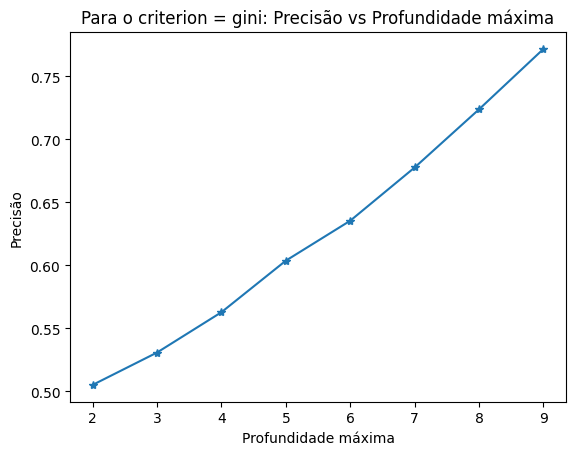

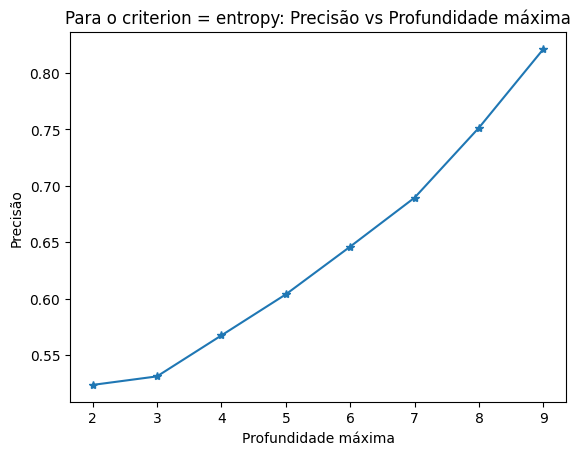

<Figure size 640x480 with 0 Axes>

In [7]:
for criterion in ["gini", "entropy"]:
    precision_scores = []
    for max_depth in range(2, 10):
        decision_tree = tree.DecisionTreeClassifier(criterion = criterion, max_depth = max_depth)
        results = decision_tree.fit(train_columns, target_column).predict(train_columns_test)
        precision_scores.append(precision_score(target_column_test, results, average='micro'))

    plt.title("Para o criterion = " + criterion + ": Precisão vs Profundidade máxima")
    plt.xlabel('Profundidade máxima')
    plt.ylabel('Precisão')
    plt.xticks(range(2, 10))
    plt.plot(range(2, 10), precision_scores, marker="*")
    #plt.savefig("arvore_" + criterion + '.png')
    plt.figure()

# Tunando parâmetros parâmetros para a regressão logística
No primeiro experimento pode ser observado que ele atingiu o limite máximo de iterações e não convergiu o algoritmo, por isso, um dos parâmetros escolhidos foi o 'max_iter' que assume valor default como 100. 
## max_iter
Número máximo de iterações realizadas para os solucionadores convergirem. Para esse teste, assumimos o range de 500 - 1000 para esse parâmetro

## solver
Algoritmo a utilizar no problema de optimização. Esse parâmetro assume 5 valores: ‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’ e ‘saga’. 

A escolha do algoritmo depende de algumas características do dataset, tais como:

- Para pequenos conjuntos de dados, 'liblinear' é uma boa escolha, enquanto 'sag' e 'saga' são mais rápidos para maiores conjuntos de dados;

- Para problemas multiclasse, apenas 'newton-cg', 'sag', 'saga' e 'lbfgs' lidam com perdas multinomiais;

- 'liblinear' é limitado a esquemas de um contra descanso.

- 'newton-cholesky' é uma boa escolha para n_samples >> n_features, especialmente com recursos categóricos codificados one-hot com categorias raras. Observe que ele é limitado à classificação binária e à redução de um versus descanso para classificação multiclasse. O uso de memória deste solucionador tem uma dependência quadrática em n_features porque ele calcula explicitamente a matriz Hessiana.

Levando em consideração o conjunto de dados usado e as propriedades descritas acima, foram escolhidos dois tipos de algoritmos para o teste: liblinear e newton-cholesky

/home/gabriel/Documents/CIn/Aprendizagem de Máquina/Classifiers/ML-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/gabriel/Documents/CIn/Aprendizagem de Máquina/Classifiers/ML-Project/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/gabriel/Documents/CIn/Aprendizagem de Máquina/Classifiers/ML-Project/venv/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/home/gabriel/Documents/CIn/Aprendizagem de Máquina/Classifiers/ML-Project/venv/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/home/gabriel/Documents/CIn/Aprendizagem de 

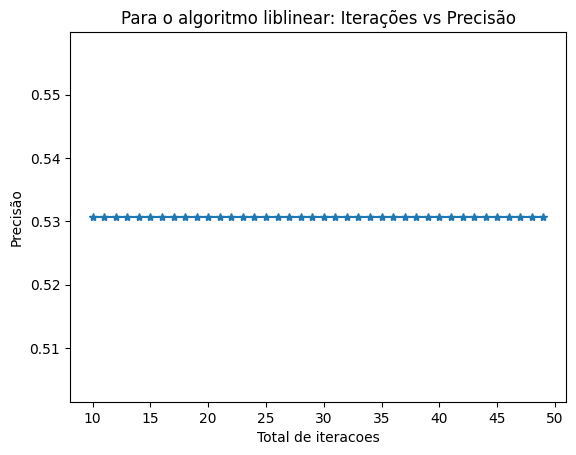

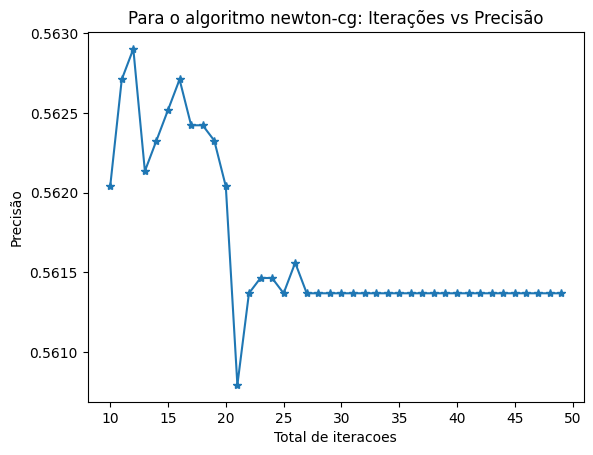

<Figure size 640x480 with 0 Axes>

In [8]:
for solver in ['liblinear', 'newton-cg']:
    precision_scores = []

    for max_iter in range(10, 50):
        logistic_reg = linear_model.LogisticRegression(max_iter = max_iter, solver = solver)
        results = logistic_reg.fit(train_columns, target_column).predict(train_columns_test)
        precision_scores.append(precision_score(target_column_test, results, average='micro'))

    plt.title('Para o algoritmo ' + solver + ': Iterações vs Precisão')
    plt.xlabel('Total de iteracoes')
    plt.ylabel('Precisão')
    plt.plot(range(10, 50), precision_scores, marker="*")
    #plt.savefig(solver + '.png')
    plt.figure()

# Tunando parâmetros parâmetros para o KNN

## Número de vizinhos
Foi definido o range de 3 - 10. Visto que a classe B possui apenas 5 ocorrências, pode-se notar que quando o K = 5, há um overfitting.

## Pesos
Função de peso usada na previsão. Valores possíveis:

‘uniform’: pesos uniformes. Todos os pontos são ponderados igualmente.

'distance': pontos de peso pelo inverso de sua distância. Neste caso, os vizinhos mais próximos de um ponto de consulta terão maior influência do que os vizinhos mais distantes.

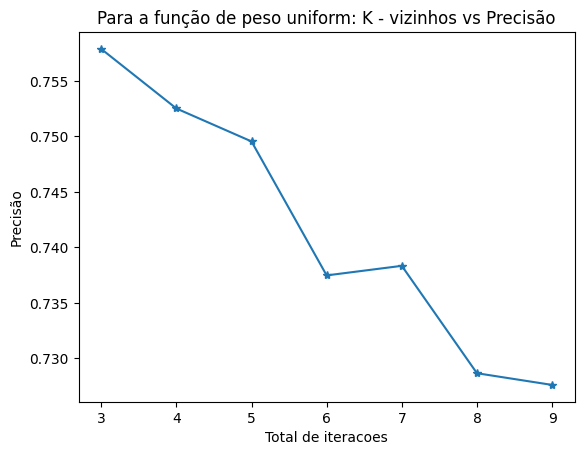

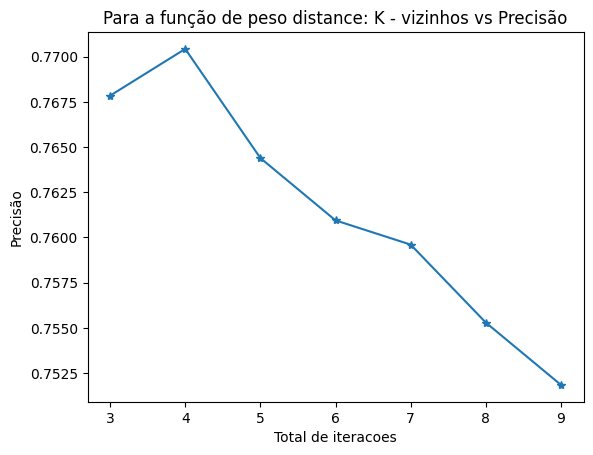

<Figure size 640x480 with 0 Axes>

In [9]:
for weights in ['uniform', 'distance']:
    precision_scores = []

    for k in range(3, 10):
        knn = neighbors.KNeighborsClassifier(n_neighbors = k, weights = weights, metric='euclidean')
        results = knn.fit(train_columns, target_column).predict(train_columns_test)
        precision_scores.append(precision_score(target_column_test, results, average='micro'))

    plt.title('Para a função de peso ' + weights + ': K - vizinhos vs Precisão')
    plt.xlabel('Total de iteracoes')
    plt.ylabel('Precisão')
    plt.plot(range(3, 10), precision_scores, marker="*")
    #plt.savefig(solver + '.png')
    plt.figure()

# Tunando parâmetros parâmetros para o Naive Bayes

O único algoritmo que deu certo rodar, devido aos dados foi o Gaussiano, por isso ele foi o escolhido. Como os dados contém valores negativos, houve a necessidade de descartar os algoritmos de Multinomial e categórico.

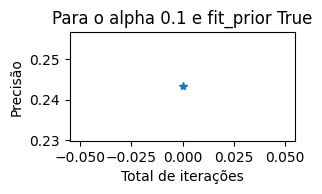

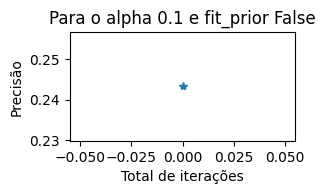

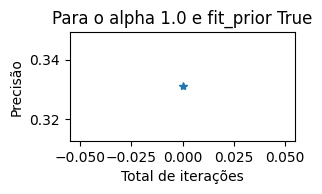

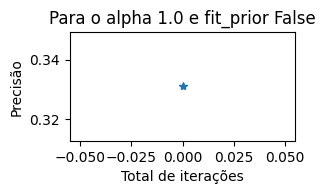

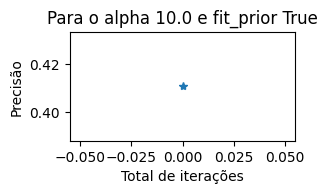

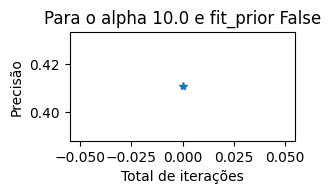

<Figure size 640x480 with 0 Axes>

In [10]:
alphas = [0.1, 1.0, 10.0]
fit_priors = [True, False]
 
precision_scores = []
for alpha in alphas:
    for fit_prior in fit_priors:
        nb = naive_bayes.GaussianNB(var_smoothing=alpha, priors=None)
        results = nb.fit(train_columns, target_column).predict(train_columns_test)
        precision_scores.append((alpha, fit_prior, precision_score(target_column_test, results, average='micro')))

# Plot the results
for i, (alpha, fit_prior, score) in enumerate(precision_scores):
    plt.subplot(len(alphas), len(fit_priors), i+1)
    plt.title(f"Para o alpha {alpha} e fit_prior {fit_prior}")
    plt.xlabel("Total de iterações")
    plt.ylabel("Precisão")
    plt.plot(score, marker="*")
    #plt.savefig(solver + '.png')
    plt.figure()